# Dataset Analysis

In [91]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
#Stylish graphs
import seaborn as sns


In [94]:
dataframe_all=pd.read_csv('ENB2012.csv')
dataframe_all.Y1 = dataframe_all.Y1.round()
dataframe_all.Y2 = dataframe_all.Y2.round()

x = dataframe_all.iloc[:,:-2].values
#Extracting the outputs for HeatLoad and ColdLoad.
y1_HL=dataframe_all.iloc[:,-2].values.ravel()
y2_CL=dataframe_all.iloc[:,-1].values.ravel()
print("Shape x:  {}     Shape y1_HL: {}  Shape y2_CL: {}".format(x.shape, y1_HL.shape,y2_CL.shape)) 


Shape x:  (768, 8)     Shape y1_HL: (768,)  Shape y2_CL: (768,)


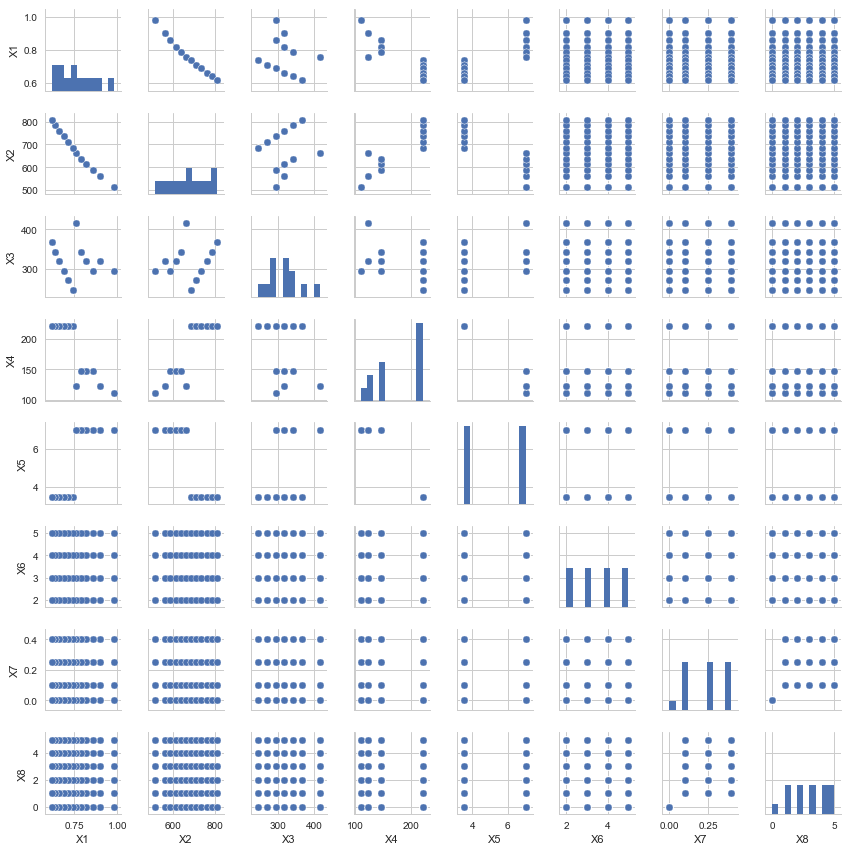

In [96]:
cols =['X1','X2','X3','X4','X5','X6','X7','X8']
sns.set(style='whitegrid', context='notebook')
sns.pairplot(dataframe_all[cols], size=1.5)
plt.show()


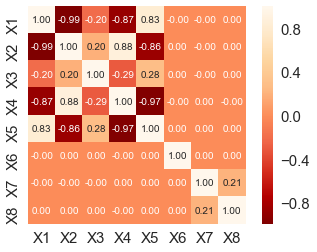

In [97]:
plt.figure(figsize=(6,4))
cm = np.corrcoef(dataframe_all[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(
    cm,
    cmap="OrRd_r",
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols,
    xticklabels=cols)
plt.savefig("./plots/correlationmatrix.png", dpi=300, bbox_inches='tight') # save as png
plt.show()

# Algorithm Comparison

Using the optimal parameters for each machine or model, compute the percentage of classification error on the three different sets: training, validation and test. Produce a bar PLOT
comparing the three errors, for all algorithms.

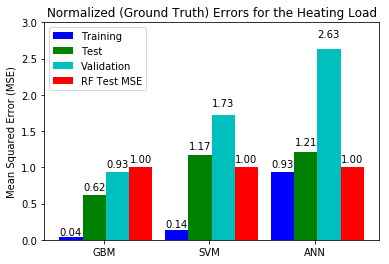

In [88]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
mean_RF = 1.03
                         #GBM  #SVM  #ANN
test_means =  np.divide((0.64, 1.20, 1.25),mean_RF)
train_means = np.divide((0.04, 0.14, 0.96),mean_RF)
val_means =   np.divide((0.96, 1.78, 2.71),mean_RF)
meansGT = (1,1,1)

ind = np.arange(N)  # the x locations for the groups
width = 0.22       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, train_means, width, color='b' )
rects2 = ax.bar(ind , test_means, width, color='g')
rects3 = ax.bar(ind+ width, val_means, width, color='c')
rects4 = ax.bar(ind+ width*2, meansGT, width, color='r')



# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Normalized (Ground Truth) Errors for the Heating Load')
ax.set_xticks(ind + width*2 -0.35 )
ax.set_xticklabels(('GBM', 'SVM', 'ANN'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4), ('Training', 'Test', 'Validation', 'RF Test MSE'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
axes = plt.gca()
axes.set_ylim([0,3])
plt.savefig("./plots/heatingloadcomparison.png", dpi=300, bbox_inches='tight') # save as png
plt.show()

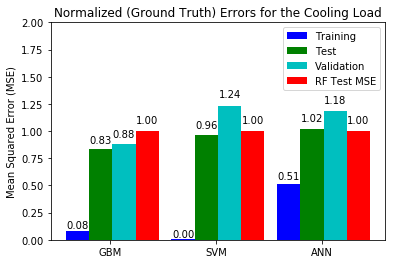

In [89]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
mean_RF = 6.59
                         #GBM  #SVM  #ANN
test_means =  np.divide((5.48, 6.35, 6.73),mean_RF)
train_means = np.divide((0.53, 0.03, 3.37),mean_RF)
val_means =   np.divide((5.80, 8.14, 7.78),mean_RF)
meansGT = (1,1,1)

ind = np.arange(N)  # the x locations for the groups
width = 0.22       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, train_means, width, color='b' )
rects2 = ax.bar(ind , test_means, width, color='g')
rects3 = ax.bar(ind+ width, val_means, width, color='c')
rects4 = ax.bar(ind+ width*2, meansGT, width, color='r')



# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Normalized (Ground Truth) Errors for the Cooling Load')
ax.set_xticks(ind + width*2 -0.35 )
ax.set_xticklabels(('GBM', 'SVM', 'ANN'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4), ('Training', 'Test', 'Validation', 'RF Test MSE'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
axes = plt.gca()
axes.set_ylim([0,2])
plt.savefig("./plots/coolingloadcomparison.png", dpi=300, bbox_inches='tight') # save as png

plt.show()